Trabajo Practico Final Matemática 3

La base de datos seleccionada contiene los registros médicos de 5000 pacientes que padecieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas. La idea es aplicar conceptos de matemática y programación para el diseño, implementación y evaluación de una red neuronal desde cero, utilizando únicamente Pandas y NumPy para predecir si un paciente sobrevivirá o no.

In [1]:
import pandas as pd

# Se cargan los datos de un archivo CSV y ajustamos los nombres de las columnas.
df = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
df.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']

df.head() # Primeras filas del DataFrame

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [2]:
df.tail(10) # Ultimas 10 filas de los registros de los pacientes.

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


Realizamos el análisis de los datos del DataFrame

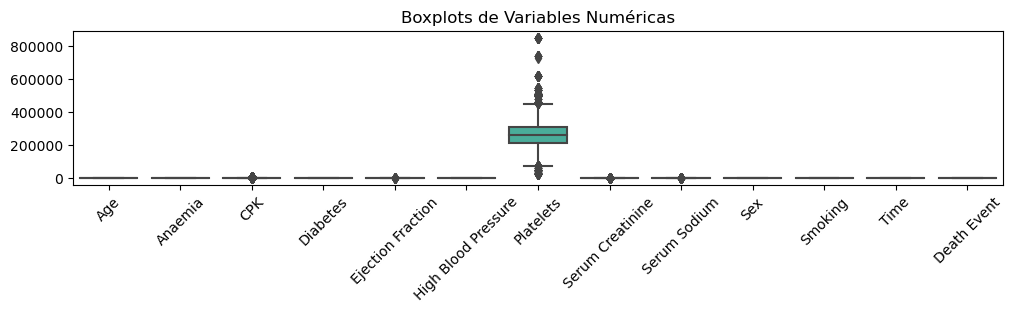

Número de Filas con Valores Atípicos: 1172


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica 
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Número de Filas con Valores Atípicos:", num_outliers)

#La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).
#La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable 
#Los valores atipicos son los puntos individuales que se pueden observar en las variables.

En la representación grafica anterior podemos ver que la variables Platelets tiene una gran cantidad de valores atipicos (outliers).

Ejection Fraction, Serum Creatinine, Serum Sodium y 'CPK': También muestran algunos outliers, pero no tantos como 'Platelets'.

La mayoría de las otras variables tienen distribuciones mucho más ajustadas con pocos o ningún outlier visible en esta escala.

In [5]:
# Calcular la mediana de cada columna numérica
medians = df[numeric_columns].median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 Age                        60.00
Anaemia                     0.00
CPK                       248.00
Diabetes                    0.00
Ejection Fraction          38.00
High Blood Pressure         0.00
Platelets              263358.03
Serum Creatinine            1.10
Serum Sodium              137.00
Sex                         1.00
Smoking                     0.00
Time                      113.00
Death Event                 0.00
dtype: float64


In [6]:
df.describe() # Resumen estadistico

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


A continuación se normalizan las columnas que no estan entre 0 y 1, dividiendo por el maximo de cada columna, para asegurar que todas las características contribuyan de manera equilibrada al entrenamiento de la red neuronal.

In [8]:
column= ['Age', 'CPK', 'Ejection Fraction', 'Platelets', 'Serum Creatinine', 'Serum Sodium','Time']

#Normalizó dividiendo cada columna por el maximo valor de esa columna para que de como resultado valores entre 0 y 1
df[column] = df[column] / df[column].max()
df.describe()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.634618,0.474400,0.074642,0.439400,0.471683,0.364800,0.311853,0.145650,0.924380,0.645600,0.311800,0.458522,0.313600
std,0.123129,0.499394,0.124251,0.496364,0.143936,0.481422,0.115294,0.107420,0.030164,0.478379,0.463275,0.271319,0.464002
min,0.421053,0.000000,0.002926,0.000000,0.175000,0.000000,0.029529,0.053191,0.763514,0.000000,0.000000,0.014035,0.000000
25%,0.526316,0.000000,0.015392,0.000000,0.375000,0.000000,0.252941,0.095745,0.905405,0.000000,0.000000,0.259649,0.000000
50%,0.631579,0.000000,0.031548,0.000000,0.475000,0.000000,0.309833,0.117021,0.925676,1.000000,0.000000,0.396491,0.000000
75%,0.715789,1.000000,0.074036,1.000000,0.562500,1.000000,0.364706,0.148936,0.945946,1.000000,1.000000,0.705263,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Analizamos la correlación de los datos

In [9]:
df.corr(method='pearson')

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
Anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
CPK,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
Diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
Ejection Fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
High Blood Pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
Platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
Serum Creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
Serum Sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
Sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


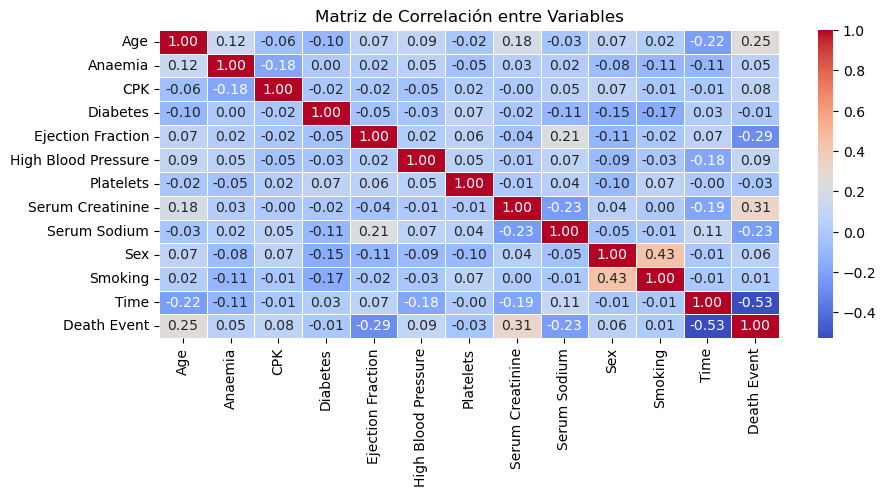

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Muchas variables no estan fuertemente correlacionadas con la variable que me interesa Death Event.

Las variables que muestran una correlación moderada con Death Event son:

Age: La edad avanzada se asocia con un mayor riesgo de muerte en pacientes con insuficiencia cardíaca.

Ejection Fraction: La fracción de eyección mide el porcentaje de sangre que el ventrículo izquierdo expulsa con cada contracción. Una fracción de eyección baja indica una función cardíaca deficiente, lo que se asocia con un mayor riesgo de complicaciones y muerte en pacientes con insuficiencia cardíaca.

Serum Creatinine: Los niveles elevados de creatinina en sangre indican una función renal deficiente. La insuficiencia renal es un factor de riesgo significativo para el pronóstico en pacientes con insuficiencia cardíaca, ya que ambos órganos están estrechamente relacionados en su función.

Serum Sodium: Los niveles de sodio en sangre pueden reflejar el estado de hidratación y la función renal. La hiponatremia (bajo nivel de sodio) es un marcador común en pacientes con insuficiencia cardíaca avanzada y se asocia con un peor pronóstico.

Time: El seguimiento del tiempo desde el diagnóstico o desde el inicio de un tratamiento específico puede proporcionar información sobre la progresión de la enfermedad y la efectividad de las intervenciones terapéuticas.
Por lo tanto estas variables pueden ser importantes para evaluar el riesgo de muerte en pacientes con insuficiencia cardíaca.

Es bueno saber que la correlación de Platelets con Death Event es baja ya que este presentaba mayor cantidad de valores atipicos, por lo tanto no lo consideramos para los valores de entrada de la Red Neuronal.

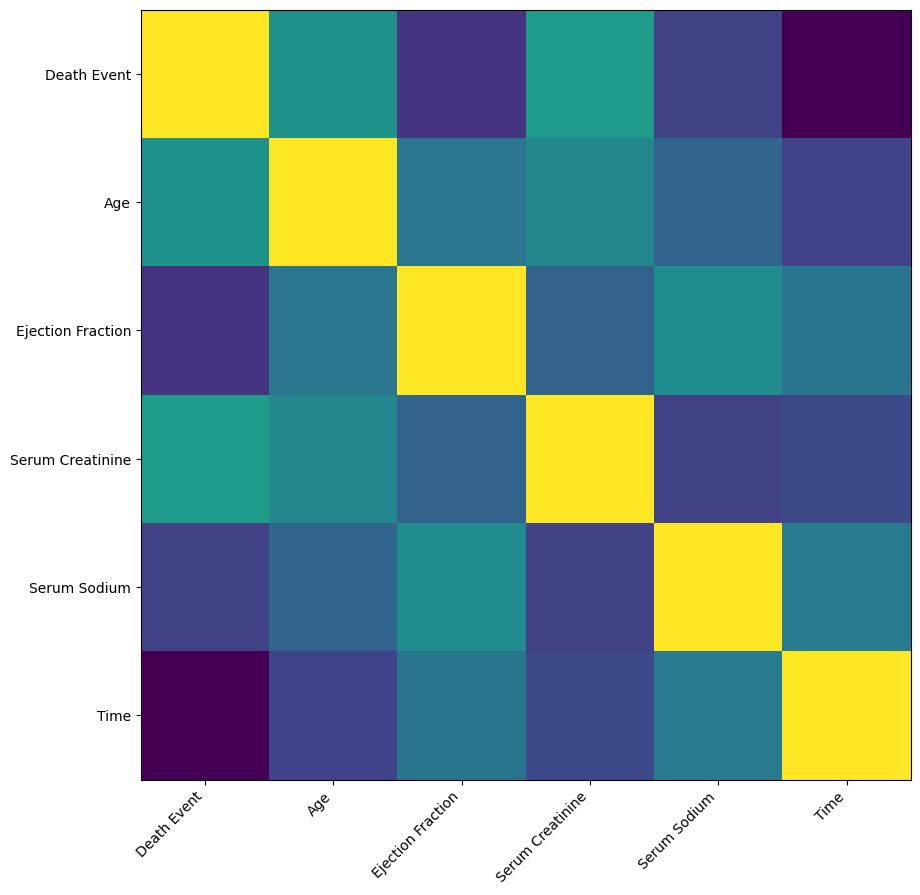

In [11]:
# Analizamos la correlación de las columnas que me interesan mediante un mapa de calor. 
data = ['Age','Ejection Fraction', 'Serum Creatinine','Serum Sodium', 'Time'] # Variables a considerar para las entradas de la red neuronal
labels = df.loc[:, ["Death Event"] + data].columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df.loc[:, ["Death Event"] + data].corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.loc[:, ["Death Event"] + data].columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.loc[:, ["Death Event"] + data].columns.to_list(), ha='right');

Fordward Propagation

- Se consideran solo las columnas que me interesan para las entradas de la red neuronal.
Las variables que muestran una correlación moderada con la variable que me interesa Death Event son: Age / Ejection Fraction / Serum Creatinine / Serum.Sodium / Time. De esta forma evitamos la variables Platelets ya que este presentaba mayor cantidad de valores atipicos.

- Se normalizan los datos con StandardScaler. Anteriormente se normalizaron las columnas que no estan entre 0 y 1, dividiendo por el maximo de cada columna pero por alguna razón con esa forma de normalizar obtenia resultados de ACCURACY entre el 30% tanto en Fordward Propagation como en Backward Propagation (ver analisis en pruebas.ipynb)

- Dos capas ocultas, la primera con 10 neuronas y la segunda con 5, Función de activación ReLU.

- 5000 máximo de iteraciones para el entrenamiento

- L = 0.01 tasa de aprendisaje

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#df1 = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
#df1.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']


X = df[data].values
Y = df['Death Event'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Número de registros de entrenamiento
n = X_train.shape[0]

np.random.seed(42)

# Construir red neuronal con pesos y sesgos
# Inicializar pesos y sesgos para las capas
# Capa 1 -> Capa 2
w_hidden1 = np.random.rand(10, 5)
b_hidden1 = np.random.rand(10, 1)

# Capa 2 -> Capa 3 (nueva capa intermedia)
w_hidden2 = np.random.rand(5, 10)
b_hidden2 = np.random.rand(5, 1)

# Capa 3 -> Salida
w_output = np.random.rand(1, 5)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
relu_derivative = lambda x: (x > 0).astype(float)
logistic = lambda x: 1 / (1 + np.exp(-x))
logistic_derivative = lambda x: logistic(x) * (1 - logistic(x))

# Función q ejecuta entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden1 @ X + b_hidden1
    A1 = relu(Z1)
    Z2 = w_hidden2 @ A1 + b_hidden2
    A2 = relu(Z2)
    Z3 = w_output @ A2 + b_output
    A3 = logistic(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[5] 
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)


#El valor de precisión (accuracy) significa que aproximadamente el 31.37% de las predicciones 
# realizadas por la red neuronal en el conjunto de prueba (X_test) fueron correctas.

ACCURACY:  0.3065386922615477


Se realiza el descenso de gradiente estocástico para entrenar la Red Neuronal

In [149]:
L = 0.01  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
    dC_dA3 = 2 * (A3 - Y)
    dA3_dZ3 = logistic_derivative(Z3)
    dZ3_dW3 = A2
    dZ3_dA2 = w_output
    dC_dZ3 = dC_dA3 * dA3_dZ3

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    dC_dB3 = np.sum(dC_dZ3, axis=1, keepdims=True)

    dC_dA2 = dZ3_dA2.T @ dC_dZ3
    dA2_dZ2 = relu_derivative(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_hidden2
    dC_dZ2 = dC_dA2 * dA2_dZ2

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    dC_dB2 = np.sum(dC_dZ2, axis=1, keepdims=True)

    dC_dA1 = dZ2_dA1.T @ dC_dZ2
    dA1_dZ1 = relu_derivative(Z1)
    dZ1_dW1 = X
    dC_dZ1 = dC_dA1 * dA1_dZ1

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    dC_dB1 = np.sum(dC_dZ1, axis=1, keepdims=True)

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3

# Ejecutar descenso de gradiente
for i in range(100000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx].reshape(1, 1)

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2, dW3, dB3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden1 -= L * dW1
    b_hidden1 -= L * dB1
    w_hidden2 -= L * dW2
    b_hidden2 -= L * dB2
    w_output -= L * dW3
    b_output -= L * dB3

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[5]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)

# El valor de precisión (accuracy) es  94,90% (mayor q el anterior) indica la proporción de predicciones correctas realizadas 
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente. 

ACCURACY:  0.9442111577684463


Realizamos pruebas de la Red Neuronal con valores aleatorios del DataFrame

In [150]:
data1 = ['Age','Ejection Fraction', 'Serum Creatinine','Serum Sodium', 'Time']
filas_aleatorias = df[data1].sample(n=10)  # Obtener 10 filas aleatorias solo para las columnas especificadas en 'data'
filas_aleatorias

,Age,Ejection Fraction,Serum Creatinine,Serum Sodium,Time
1322,0.631579,0.3750,0.244681,0.925676,0.105263
1018,0.473684,0.4375,0.113830,0.905405,0.652632
2820,0.526316,0.3750,0.127660,0.918919,0.112281
192,0.789474,0.4750,0.425532,0.885135,0.035088
37,0.515789,0.3750,0.106383,0.932432,0.042105
2887,0.526316,0.2500,0.106383,0.905405,0.652632
4232,0.705263,0.4750,0.127660,0.898649,0.859649
4901,0.557895,0.5000,0.127660,0.878378,0.750877
3833,0.484211,0.4375,0.095745,0.945946,0.382456
1516,0.473684,0.2500,0.170213,0.912162,0.631579


In [151]:
for i, row in filas_aleatorias.iterrows():
    X_sample = row.values.reshape(1, -1)
    X_sample = scaler.transform(X_sample)  # Normalizar el ejemplo

    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample.transpose())

    prediccion = (A3 > 0.5).astype(int)

    print("Ejemplo", i)
    print("Predicción:", prediccion)
    print("Activaciones de la capa de salida:", A3)

Ejemplo 1322
Predicción: [[0]]
Activaciones de la capa de salida: [[0.0051424]]
 
Ejemplo 1018
Predicción: [[0]]
Activaciones de la capa de salida: [[1.37472685e-05]]
 
Ejemplo 2820
Predicción: [[1]]
Activaciones de la capa de salida: [[0.84769109]]
 
Ejemplo 192
Predicción: [[1]]
Activaciones de la capa de salida: [[1.]]
 
Ejemplo 37
Predicción: [[0]]
Activaciones de la capa de salida: [[0.2134154]]
 
Ejemplo 2887
Predicción: [[0]]
Activaciones de la capa de salida: [[0.11201409]]
 
Ejemplo 4232
Predicción: [[0]]
Activaciones de la capa de salida: [[3.47595313e-13]]
 
Ejemplo 4901
Predicción: [[0]]
Activaciones de la capa de salida: [[7.1828978e-09]]
 
Ejemplo 3833
Predicción: [[0]]
Activaciones de la capa de salida: [[0.00211363]]
 
Ejemplo 1516
Predicción: [[1]]
Activaciones de la capa de salida: [[0.89588087]]
 


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['Death Event']).values
Y = df['Death Event'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Crear el modelo
nn = MLPClassifier(solver='adam',
                   hidden_layer_sizes=(10, 5),
                   activation='relu',
                   max_iter=5000,
                   learning_rate_init=0.01,
                   alpha=0.0001)

# Entrenar el modelo
nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
#print("Pesos de las capas:", nn.coefs_)
#print("Sesgos de las capas:", nn.intercepts_)

# Evaluar el modelo
train_score = nn.score(X_train, Y_train)
test_score = nn.score(X_test, Y_test)
print("Puntaje del conjunto de entrenamiento: %f" % train_score)
print("Puntaje del conjunto de prueba: %f" % test_score)

Puntaje del conjunto de entrenamiento: 0.990399
Puntaje del conjunto de prueba: 0.954409
